<a href="https://colab.research.google.com/github/sahithreddy54321/Intel_Unnati_TheStinsons/blob/main/Intel_Unnati_code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#SMART MOBILE PRICE PREDICTION USING MACHINE LEARNING

#Abstract

This project focuses on the implementation and comparison of two popular machine learning algorithms, Random Forest and Support Vector Machine (SVM), for predicting the price of mobile phones. The goal is to develop models that can accurately estimate the price of a mobile phone based on its various features and specifications. The dataset used for training and evaluation consists of a diverse range of mobile phones with their corresponding features and prices.

# Data Collection


Let's import all the necessary modules

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Now lets import our dataset.
This dataset isn't downloaded from any data collecting website instead we scraped the data from multiple web sources.
To get an idea lets print a sample from the dataset.

In [ ]:
df = pd.read_csv("dataset.csv")
df.head()

,Unnamed: 0,name,Brand,RAM,Internal_Memory,Processor,back_camera,front_camera,battery,android_version,UI,Display_type,Resolution,Thickness,weight,display_size,Refresh_Rate,price
0,0,OnePlus Nord CE 3 Lite 5G,OnePlus,8 GB,128 GB\nBest in Class â–¾,Qualcomm Snapdragon 695,108 MP + 2 MP + 2 MP,16 MP,5000 mAh,Android v13,Oxygen OS,IPS LCD,1080 x 2400 pixels,8.3 mm\nVery Good â–¾,195.0,6.72 inches (17.07 cm),120 Hz,"19,999"
1,1,Samsung Galaxy F54 5G,Samsung,8 GB,256 GB\nBest in Class â–¾,Samsung Exynos 1380,108 MP + 8 MP + 2 MP,32 MP,6000 mAh,Android v13,Samsung One UI,Super AMOLED Plus,1080 x 2400 pixels,8.4 mm\nVery Good â–¾,199.0,6.7 inches (17.02 cm),NaN,"29,999"
2,2,realme 10 Pro Plus 5G,realme,6 GB,128 GB\nBest in Class â–¾,MediaTek Dimensity 1080 MT6877V,108 MP + 8 MP + 2 MP,16 MP,5000 mAh,Android v13,Realme UI,AMOLED,1080 x 2412 pixels,7.7 mm\nVery Good â–¾,172.5,6.7 inches (17.02 cm),120 Hz,"24,810"
3,3,realme Narzo N53,realme,4 GB,64 GB\nBest in Class â–¾,Unisoc T612,50 MP,8 MP,5000 mAh,Android v13,Realme UI,IPS LCD,1080 x 2400 pixels,7.4 mm\nVery Good â–¾,182.0,6.74 inches (17.12 cm),NaN,"8,999"
4,4,OnePlus 11R,OnePlus,8 GB,128 GB\nBest in Class â–¾,Qualcomm Snapdragon 8 Plus Gen 1,50 MP + 8 MP + 2 MP,16 MP,5000 mAh,Android v13,Oxygen OS,Super Fluid AMOLED,1240 x 2772 pixels,8.7 mm\nGood â–¾,205.0,6.74 inches (17.12 cm),120 Hz,"39,999"


# Data Exploration and Preprocessing


Lets exclude unwanted data columns and check the description.

In [ ]:
df = df.drop("Unnamed: 0", axis=1)
df.describe()

,weight
count,373.000000
mean,192.201512
std,15.659789
min,133.000000
25%,182.000000
50%,191.829315
75%,200.000000
max,263.000000


In [ ]:
import pandas as pd

# Create a DataFrame with the column names, non-null counts, and data types
df_info = pd.DataFrame({
    'Column': df.columns,
    'Non-Null Count': df.count(),
    'Dtype': df.dtypes
})

df_info

,Column,Non-Null Count,Dtype
name,name,373,object
Brand,Brand,373,object
RAM,RAM,373,object
Internal_Memory,Internal_Memory,373,object
Processor,Processor,373,object
back_camera,back_camera,373,object
front_camera,front_camera,372,object
battery,battery,372,object
android_version,android_version,373,object
UI,UI,373,object


Now Lets check for any noisy data or empty columns

In [ ]:
df.isnull().sum()

name                5
Brand               5
RAM                 5
Internal_Memory     5
Processor           5
back_camera         5
front_camera        6
battery             6
android_version     5
UI                  5
Display_type        5
Resolution          5
Thickness           5
weight              5
display_size        6
Refresh_Rate       79
price               5
dtype: int64

Yes, There is noisy and missing data as we suspected. Now lets remove all the irrelevant data

In [ ]:
df['RAM'] = pd.to_numeric(df['RAM'].astype(str).str.split().str[0], errors='coerce')
df['Internal_Memory'] = pd.to_numeric(df['Internal_Memory'].astype(str).str.split().str[0], errors='coerce')
df['Thickness'] = pd.to_numeric(df['Thickness'].astype(str).str.split().str[0], errors='coerce')
df['display_size'] = pd.to_numeric(df['display_size'].astype(str).str.split().str[0], errors='coerce')
df['Refresh_Rate'] = pd.to_numeric(df['Refresh_Rate'].astype(str).str.split().str[0], errors='coerce')

df.dropna(subset=['UI'], inplace=True)

Now lets check all the columns for Nan Values

In [ ]:
df.isnull().sum()

name                 0
Brand                0
RAM                  1
Internal_Memory      1
Processor            0
back_camera          0
front_camera         1
battery              1
android_version      0
UI                   0
Display_type         0
Resolution           0
Thickness            0
weight               0
display_size         1
Refresh_Rate       177
price                0
dtype: int64

Now, lets convert the expandable memory column into only int values so that it becomes easy for us inorder to train the model.



First we convert the values 'No' to 0 and lets remove all the text values

Now lets again view our dataframe

In [ ]:
df

,name,Brand,RAM,Internal_Memory,Processor,back_camera,front_camera,battery,android_version,UI,Display_type,Resolution,Thickness,weight,display_size,Refresh_Rate,price
0,OnePlus Nord CE 3 Lite 5G,OnePlus,8.0,128.0,Qualcomm Snapdragon 695,108 MP + 2 MP + 2 MP,16 MP,5000 mAh,Android v13,Oxygen OS,IPS LCD,1080 x 2400 pixels,8.30,195.000000,6.72,120.0,"19,999"
1,Samsung Galaxy F54 5G,Samsung,8.0,256.0,Samsung Exynos 1380,108 MP + 8 MP + 2 MP,32 MP,6000 mAh,Android v13,Samsung One UI,Super AMOLED Plus,1080 x 2400 pixels,8.40,199.000000,6.70,NaN,"29,999"
2,realme 10 Pro Plus 5G,realme,6.0,128.0,MediaTek Dimensity 1080 MT6877V,108 MP + 8 MP + 2 MP,16 MP,5000 mAh,Android v13,Realme UI,AMOLED,1080 x 2412 pixels,7.70,172.500000,6.70,120.0,"24,810"
3,realme Narzo N53,realme,4.0,64.0,Unisoc T612,50 MP,8 MP,5000 mAh,Android v13,Realme UI,IPS LCD,1080 x 2400 pixels,7.40,182.000000,6.74,NaN,"8,999"
4,OnePlus 11R,OnePlus,8.0,128.0,Qualcomm Snapdragon 8 Plus Gen 1,50 MP + 8 MP + 2 MP,16 MP,5000 mAh,Android v13,Oxygen OS,Super Fluid AMOLED,1240 x 2772 pixels,8.70,205.000000,6.74,120.0,"39,999"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Infinix Note 12 Pro,Infinix,8.0,128.0,MediaTek Dimensity 810 MT6833,108 MP + 2 MP + 2 MP,16 MP,5000 mAh,Android v12,XOS,AMOLED,1080 x 2400 pixels,7.90,188.000000,6.70,700.0,19990
374,OPPO F21s Pro 5G,OPPO,8.0,128.0,Qualcomm Snapdragon 695,64 MP + 2 MP + 2 MP,16 MP,4500 mAh,Android v12,ColorOS,AMOLED,1080 x 2400 pixels,7.60,181.000000,6.43,600.0,21999
375,Tecno Spark Go 2023,Tecno,3.0,32.0,MediaTek Helio A22,13 MP + 0.08 MP,5 MP,5000 mAh,Android v12,HiOS,IPS LCD,720 x 1612 pixels,8.90,191.829315,6.56,60.0,6999
376,Xiaomi Redmi Note 11T 5G,Xiaomi,6.0,64.0,MediaTek Dimensity 810 MT6833,50 MP + 8 MP,16 MP,5000 mAh,Android v11,MIUI,IPS LCD,1080 x 2400 pixels,8.75,195.000000,6.60,90.0,16999


In [ ]:
df['Brand'].unique()

array(['OnePlus', 'Samsung', 'realme', 'vivo', 'iQOO', 'Apple', 'Xiaomi',
       'OPPO', 'Nothing', 'Google', 'POCO', 'Motorola', 'Tecno',
       'Infinix', 'Lava', 'Nokia'], dtype=object)

Now in the same way lets remove all the unwanted characters and keep only the int values for columns back_camera, front_camera, battery, and android_version

In [ ]:
import re
def extract_numeric_value(text):
    pattern = r'\d+'  # Regular expression pattern to match one or more digits
    matches = re.findall(pattern, str(text))
    if matches:
        return int(matches[0])
    else:
        return None

# Apply the function to the specified columns
df['back_camera'] = df['back_camera'].apply(extract_numeric_value)
df['front_camera'] = df['front_camera'].apply(extract_numeric_value)
df['battery'] = df['battery'].apply(extract_numeric_value)
df['android_version'] = df['android_version'].apply(extract_numeric_value)

Now lets remove al the commas and convert the price column into string format from the object format

In [ ]:
def extract_numeric_value(text):
    pattern = r'\d+'  # Regular expression pattern to match one or more digits
    matches = re.findall(pattern, str(text.replace(',', '')))
    if matches:
        return int(matches[0])
    else:
        return None


df['price'] = df['price'].apply(extract_numeric_value)

In [ ]:
df.iloc[13].values

array(['Apple iPhone 14 Pro Max', 'Apple', 6.0, 128.0, 'Apple A16 Bionic',
       48.0, 12.0, 4323.0, 16, 'iOS', 'OLED', '1290 x 2796 pixels', 7.8,
       240.0, 6.7, nan, 127999], dtype=object)

Now let us fill all the Nan values with the mean values and drop the rows where the column 'UI' has no values

In [ ]:
df['battery'] = df['battery'].fillna(df['battery'].mean())
df['back_camera'] = df['back_camera'].fillna(df['back_camera'].mean())
df['front_camera'] = df['front_camera'].fillna(df['front_camera'].mean())
df['display_size'] = df['display_size'].fillna(df['display_size'].mean())
df['Refresh_Rate'] = df['Refresh_Rate'].fillna(df['Refresh_Rate'].mean())
df['RAM'] = df['RAM'].fillna(df['RAM'].mean())
df['Internal_Memory'] = df['Internal_Memory'].fillna(df['Internal_Memory'].mean())
df = df.dropna(subset=['UI'])

In [ ]:
from tabulate import tabulate

summary_stats = df.describe().loc[['min', 'max', 'mean', 'std']].transpose()

# Convert the summary statistics DataFrame to a list of lists
summary_stats_table = summary_stats.reset_index().values.tolist()

# Define the headers for the table
headers = ['Features', 'Minimum', 'Maximum', 'Mean', 'StdDiv']

# Generate the formatted table
table = tabulate(summary_stats_table, headers=headers, tablefmt='grid')

# Print the table
print(table)


+-----------------+-----------+-----------+-------------+--------------+
| Features        |   Minimum |   Maximum |        Mean |       StdDiv |
+=================+===========+===========+=============+==============+
| RAM             |       2   |     16    |     6.45699 |     2.23866  |
+-----------------+-----------+-----------+-------------+--------------+
| Internal_Memory |      32   |    256    |   121.806   |    54.4755   |
+-----------------+-----------+-----------+-------------+--------------+
| back_camera     |       8   |    200    |    56.0484  |    30.411    |
+-----------------+-----------+-----------+-------------+--------------+
| front_camera    |       5   |     60    |    17.0968  |    10.5663   |
+-----------------+-----------+-----------+-------------+--------------+
| battery         |    2227   |   7000    |  4833.55    |   576.078    |
+-----------------+-----------+-----------+-------------+--------------+
| android_version |       9   |     16    |    12.1

Now let us again check if we have any Nan values

In [ ]:
df.isnull().sum()

name               0
Brand              0
RAM                0
Internal_Memory    0
Processor          0
back_camera        0
front_camera       0
battery            0
android_version    0
UI                 0
Display_type       0
Resolution         0
Thickness          0
weight             0
display_size       0
Refresh_Rate       0
price              0
dtype: int64

Now lets check the datatypes of all the columns in our dataframe

In [ ]:
df.dtypes

name                object
Brand               object
RAM                float64
Internal_Memory    float64
Processor           object
back_camera        float64
front_camera       float64
battery            float64
android_version      int64
UI                  object
Display_type        object
Resolution          object
Thickness          float64
weight             float64
display_size       float64
Refresh_Rate       float64
price                int64
dtype: object

As we saw that some of our columns are in Object format and some of them are in Float format. So now lets change the formats to int

In [ ]:
# Convert specific columns to int
columns_to_convert_int = ['RAM', 'Internal_Memory', 'back_camera', 'front_camera', 'battery',
                          'android_version','Thickness', 'weight', 'display_size', 'Refresh_Rate','price']
df[columns_to_convert_int] = df[columns_to_convert_int].astype(int)

In [ ]:
df.dtypes

name               object
Brand              object
RAM                 int64
Internal_Memory     int64
Processor          object
back_camera         int64
front_camera        int64
battery             int64
android_version     int64
UI                 object
Display_type       object
Resolution         object
Thickness           int64
weight              int64
display_size        int64
Refresh_Rate        int64
price               int64
dtype: object

In [ ]:
df1 = df.copy(deep=True)
df.info

<bound method DataFrame.info of                           name    Brand  RAM  Internal_Memory  \
0    OnePlus Nord CE 3 Lite 5G  OnePlus    8              128   
1        Samsung Galaxy F54 5G  Samsung    8              256   
2        realme 10 Pro Plus 5G   realme    6              128   
3             realme Narzo N53   realme    4               64   
4                  OnePlus 11R  OnePlus    8              128   
..                         ...      ...  ...              ...   
373        Infinix Note 12 Pro  Infinix    8              128   
374           OPPO F21s Pro 5G     OPPO    8              128   
375        Tecno Spark Go 2023    Tecno    3               32   
376   Xiaomi Redmi Note 11T 5G   Xiaomi    6               64   
377         Samsung Galaxy A52  Samsung    6              128   

                            Processor  back_camera  front_camera  battery  \
0             Qualcomm Snapdragon 695          108            16     5000   
1                 Samsung Exynos 

In [ ]:
df1

,name,Brand,RAM,Internal_Memory,Processor,back_camera,front_camera,battery,android_version,UI,Display_type,Resolution,Thickness,weight,display_size,Refresh_Rate,price
0,OnePlus Nord CE 3 Lite 5G,OnePlus,8,128,Qualcomm Snapdragon 695,108,16,5000,13,Oxygen OS,IPS LCD,1080 x 2400 pixels,8,195,6,120,19999
1,Samsung Galaxy F54 5G,Samsung,8,256,Samsung Exynos 1380,108,32,6000,13,Samsung One UI,Super AMOLED Plus,1080 x 2400 pixels,8,199,6,506,29999
2,realme 10 Pro Plus 5G,realme,6,128,MediaTek Dimensity 1080 MT6877V,108,16,5000,13,Realme UI,AMOLED,1080 x 2412 pixels,7,172,6,120,24810
3,realme Narzo N53,realme,4,64,Unisoc T612,50,8,5000,13,Realme UI,IPS LCD,1080 x 2400 pixels,7,182,6,506,8999
4,OnePlus 11R,OnePlus,8,128,Qualcomm Snapdragon 8 Plus Gen 1,50,16,5000,13,Oxygen OS,Super Fluid AMOLED,1240 x 2772 pixels,8,205,6,120,39999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Infinix Note 12 Pro,Infinix,8,128,MediaTek Dimensity 810 MT6833,108,16,5000,12,XOS,AMOLED,1080 x 2400 pixels,7,188,6,700,19990
374,OPPO F21s Pro 5G,OPPO,8,128,Qualcomm Snapdragon 695,64,16,4500,12,ColorOS,AMOLED,1080 x 2400 pixels,7,181,6,600,21999
375,Tecno Spark Go 2023,Tecno,3,32,MediaTek Helio A22,13,5,5000,12,HiOS,IPS LCD,720 x 1612 pixels,8,191,6,60,6999
376,Xiaomi Redmi Note 11T 5G,Xiaomi,6,64,MediaTek Dimensity 810 MT6833,50,16,5000,11,MIUI,IPS LCD,1080 x 2400 pixels,8,195,6,90,16999


In [ ]:
df.describe()

,RAM,Internal_Memory,back_camera,front_camera,battery,android_version,Thickness,weight,display_size,Refresh_Rate,price
count,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000,373.000000
mean,6.455764,121.804290,56.048257,17.096515,4833.546917,12.128686,7.809651,192.120643,6.000000,506.168901,28620.091153
std,2.238783,54.475473,30.411034,10.566294,576.078326,1.094737,0.666973,15.664800,0.103695,394.892078,23390.276077
min,2.000000,32.000000,8.000000,5.000000,2227.000000,9.000000,6.000000,133.000000,5.000000,60.000000,5549.000000
25%,4.000000,64.000000,50.000000,8.000000,4500.000000,12.000000,7.000000,182.000000,6.000000,120.000000,13999.000000
50%,6.000000,128.000000,50.000000,16.000000,5000.000000,12.000000,8.000000,191.000000,6.000000,506.000000,20999.000000
75%,8.000000,128.000000,64.000000,16.000000,5000.000000,13.000000,8.000000,200.000000,6.000000,506.000000,32999.000000
max,16.000000,256.000000,200.000000,60.000000,7000.000000,16.000000,10.000000,263.000000,7.000000,2000.000000,127999.000000


As we know the values in the price columns are something like 23999, 57999, etc which will impact the accuracy of our model. So inorder to avoid the problem we will convert the price value into a range of values to its lowest and highest 10,000

In [ ]:
def round_price(value):
    if value < 10000:
        return f"0 - 10000"
    else:
        lower_range = int(value/10000) * 10000
        upper_range = lower_range + 10000
        return f"{lower_range} - {upper_range}"

# Apply the function to the 'price' column
df['price'] = df['price'].apply(round_price)

As we have converted the price column lets similarly convert all the other columns which are in object format into categorical values.

In [ ]:
from sklearn.preprocessing import LabelEncoder

Brand_le = LabelEncoder()
processor_le = LabelEncoder()
display_le = LabelEncoder()
res_le = LabelEncoder()
ui_le = LabelEncoder()

# Convert text columns to categorical codes
df['Brand'] = Brand_le.fit_transform(df['Brand'])
df['Processor'] = processor_le.fit_transform(df['Processor'].astype(str))
df['UI'] = ui_le.fit_transform(df['UI'])
df['Display_type'] = display_le.fit_transform(df['Display_type'])
df['Resolution'] = res_le.fit_transform(df['Resolution'])
#df['price'] = label_encoder.fit_transform(df['price'])

Now the columns Brand, Processor, UI, Display_type, Resolution are successfully converted into the categorical values which improves the performance of our model.

Now let us divide the price column into two columns 'min_price' and 'max_price'.

Now lets create a dictionary of the price values as keys and their categorical values as values.

The Categorical Values starts from 1. They are categorized as 1 if the price range is 10000-20000 and 2 if the price range is 20000-30000 and so on..


In [ ]:
df[['min_price', 'max_price']] = df['price'].str.split('-', expand=True)
df['min_price'] = pd.to_numeric(df['min_price'], errors='coerce')
df['max_price'] = pd.to_numeric(df['max_price'], errors='coerce')

# Define the price range mapping
price_mapping = {}
start_price = 0
end_price = 200000
step = 10000

# Generate the price ranges and assign categorical codes
for price in range(start_price, end_price + 1, step):
    price_range = f"{price} - {price + step}"
    code = int(price / step)
    price_mapping[code] = price_range

# Convert the 'price' column to categorical codes based on minimum value
df['price'] = pd.cut(df['min_price'], bins=np.arange(start_price, end_price + step, step), labels=False)+1

# Print the updated DataFrame and price mapping
print(price_mapping)

{0: '0 - 10000', 1: '10000 - 20000', 2: '20000 - 30000', 3: '30000 - 40000', 4: '40000 - 50000', 5: '50000 - 60000', 6: '60000 - 70000', 7: '70000 - 80000', 8: '80000 - 90000', 9: '90000 - 100000', 10: '100000 - 110000', 11: '110000 - 120000', 12: '120000 - 130000', 13: '130000 - 140000', 14: '140000 - 150000', 15: '150000 - 160000', 16: '160000 - 170000', 17: '170000 - 180000', 18: '180000 - 190000', 19: '190000 - 200000', 20: '200000 - 210000'}


In [ ]:
df

,name,Brand,RAM,Internal_Memory,Processor,back_camera,front_camera,battery,android_version,UI,Display_type,Resolution,Thickness,weight,display_size,Refresh_Rate,price,min_price,max_price
0,OnePlus Nord CE 3 Lite 5G,8,8,128,43,108,16,5000,13,6,4,2,8,195,6,120,1.0,10000,20000
1,Samsung Galaxy F54 5G,10,8,256,59,108,32,6000,13,8,11,2,8,199,6,506,2.0,20000,30000
2,realme 10 Pro Plus 5G,14,6,128,6,108,16,5000,13,7,1,5,7,172,6,120,2.0,20000,30000
3,realme Narzo N53,14,4,64,68,50,8,5000,13,7,4,2,7,182,6,506,NaN,0,10000
4,OnePlus 11R,8,8,128,51,50,16,5000,13,6,12,10,8,205,6,120,3.0,30000,40000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,Infinix Note 12 Pro,2,8,128,14,108,16,5000,12,9,1,2,7,188,6,700,1.0,10000,20000
374,OPPO F21s Pro 5G,7,8,128,43,64,16,4500,12,2,1,2,7,181,6,600,2.0,20000,30000
375,Tecno Spark Go 2023,11,3,32,25,13,5,5000,12,4,4,21,8,191,6,60,NaN,0,10000
376,Xiaomi Redmi Note 11T 5G,12,6,64,14,50,16,5000,11,5,4,2,8,195,6,90,1.0,10000,20000


Now as we expected the price values are converted into categories and there are some Nan values. These Nan values are the values whose price is below 10000. So lets just fill all these values with 0 as their value.

In [ ]:
df['price'] = df['price'].fillna(0)
df = df.drop('name',axis = 1)
df=df.drop('min_price',axis = 1)
df=df.drop('max_price',axis = 1)
df

,Brand,RAM,Internal_Memory,Processor,back_camera,front_camera,battery,android_version,UI,Display_type,Resolution,Thickness,weight,display_size,Refresh_Rate,price
0,8,8,128,43,108,16,5000,13,6,4,2,8,195,6,120,1.0
1,10,8,256,59,108,32,6000,13,8,11,2,8,199,6,506,2.0
2,14,6,128,6,108,16,5000,13,7,1,5,7,172,6,120,2.0
3,14,4,64,68,50,8,5000,13,7,4,2,7,182,6,506,0.0
4,8,8,128,51,50,16,5000,13,6,12,10,8,205,6,120,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
373,2,8,128,14,108,16,5000,12,9,1,2,7,188,6,700,1.0
374,7,8,128,43,64,16,4500,12,2,1,2,7,181,6,600,2.0
375,11,3,32,25,13,5,5000,12,4,4,21,8,191,6,60,0.0
376,12,6,64,14,50,16,5000,11,5,4,2,8,195,6,90,1.0


Now all the columns are in the integer form and this makes the model to perform better.

#Data Visualization

Now lets see the correlation matrix

In [ ]:
corr = df.corr()
corr.shape

(16, 16)

Lets plot the heat map of our Correlation matrix

<Axes: >

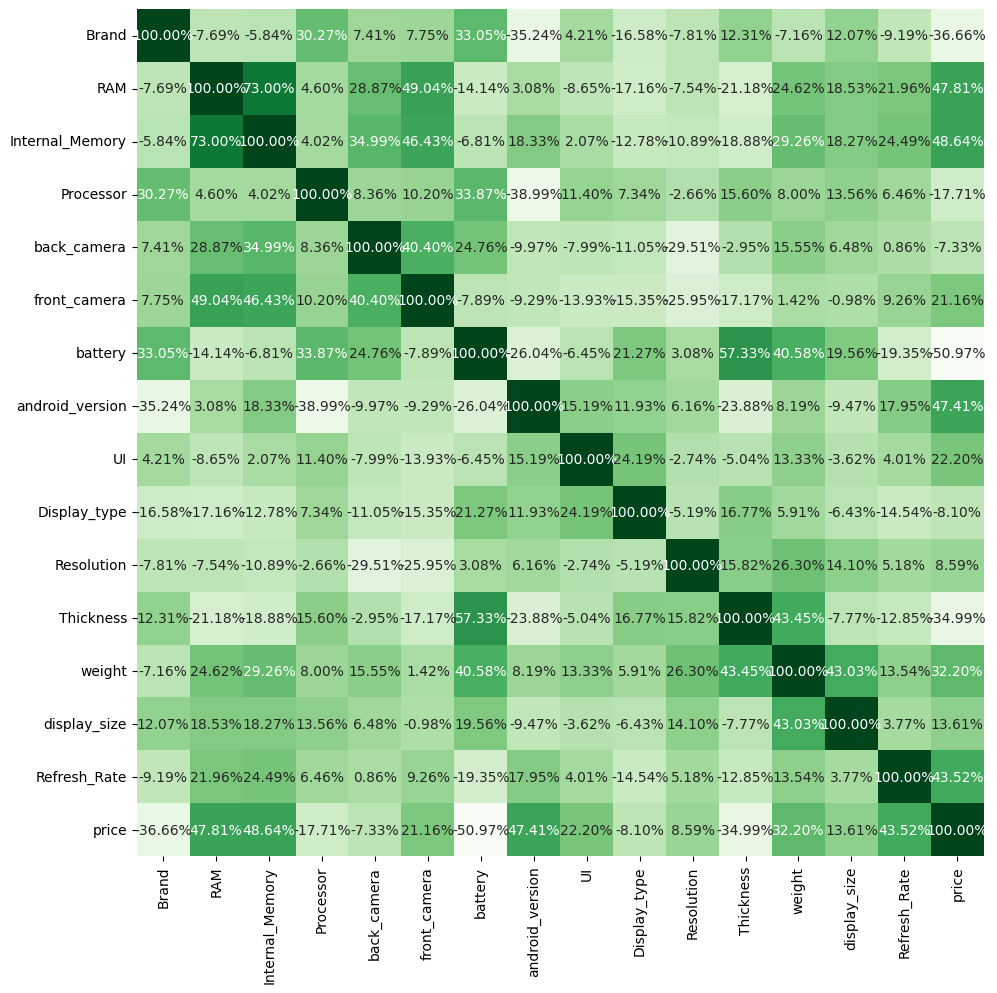

In [ ]:
import seaborn as sns
plt.figure(figsize=(11,11))
sns.heatmap(corr, cbar=False, square= True, fmt='.2%', annot=True, cmap='Greens')

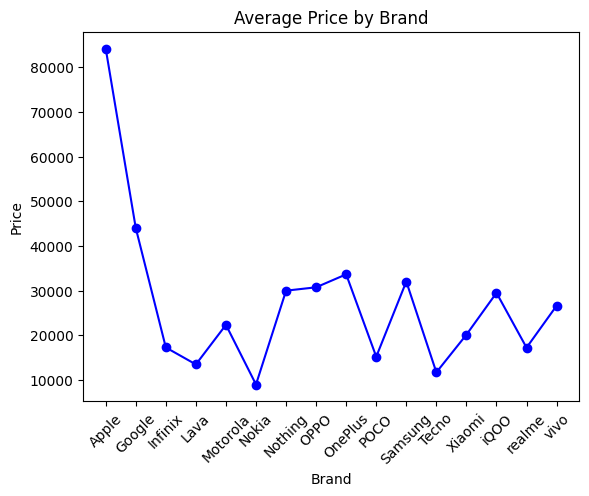

In [ ]:
import matplotlib.pyplot as plt

# Group the data by 'Brand' and calculate the average price for each brand
brand_prices = df1.groupby('Brand')['price'].mean()

# Create a line plot
plt.plot(brand_prices.index, brand_prices.values, marker='o', linestyle='-', color='blue')

# Set the x-axis label
plt.xlabel('Brand')

# Set the y-axis label
plt.ylabel('Price')

# Set the title
plt.title('Average Price by Brand')

# Rotate the x-axis labels if needed
plt.xticks(rotation=45)

# Show the plot
plt.show()


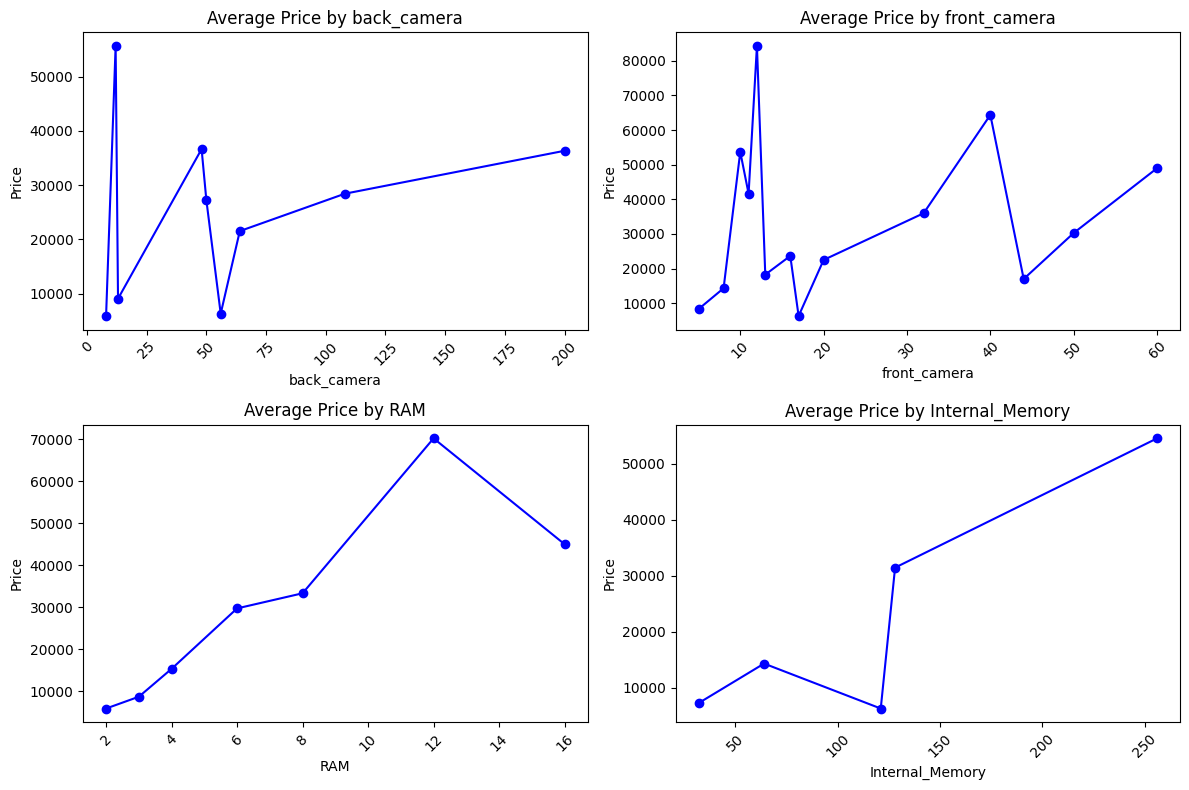

In [ ]:
import matplotlib.pyplot as plt

# Define the list of features
features = ['back_camera','front_camera', 'RAM', 'Internal_Memory']

# Create subplots
fig, axes = plt.subplots(nrows=len(features)//2, ncols=2, figsize=(12, len(features)*2))

# Iterate over the features and create line plots
for i, feature in enumerate(features):
    # Group the data by the feature and calculate the average price for each value
    feature_prices = df1.groupby(feature)['price'].mean()

    # Convert the feature_prices to a pandas Series
    feature_prices = pd.Series(feature_prices)

    # Calculate the subplot indices based on the current feature
    row = i // 2
    col = i % 2

    # Create a line plot in the corresponding subplot
    feature_prices.plot(marker='o', linestyle='-', color='blue', ax=axes[row, col])

    # Set the x-axis label
    axes[row, col].set_xlabel(feature)

    # Set the y-axis label
    axes[row, col].set_ylabel('Price')

    # Set the title
    axes[row, col].set_title('Average Price by {}'.format(feature))

    # Rotate the x-axis labels if needed
    axes[row, col].tick_params(axis='x', rotation=45)

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()


#Feature Selection

Now we have almost 18 columns in the dataframe. Training the model with all those columns included can effect the model performance in a negative way as it may lead to overfitting.

In order to avoid the overfitting lets train our model only with the top 10 best features. These features can be identified using chi2 algorithm.

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2

# Separate the features (X) and the target variable (y)
X = df.drop('price', axis=1)
y = df['price']

# Apply feature selection using SelectKBest and chi2
k = 10  # Number of top features to select
selector = SelectKBest(chi2, k=k)
X_new = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Print the selected features
print("Selected Features:")
print(selected_features)


Selected Features:
Index(['Brand', 'RAM', 'Internal_Memory', 'Processor', 'back_camera',
       'front_camera', 'battery', 'Resolution', 'weight', 'Refresh_Rate'],
      dtype='object')


In [ ]:
scores, p_values = chi2(X, y)

# Print the scores for each feature
feature_names = X.columns

# Print the scores for each feature
for i, score in enumerate(scores):
    print(f"{feature_names[i]}: {score}")

Brand: 160.34428479913683
RAM: 139.90101144931506
Internal_Memory: 3829.3356645393665
Processor: 431.3332859092042
back_camera: 1084.925101070369
front_camera: 754.206871509085
battery: 8779.450998623272
android_version: 12.370421735699825
UI: 68.49400651954241
Display_type: 35.827955172244906
Resolution: 1006.0989784791215
Thickness: 4.425810260674499
weight: 110.37222917285952
display_size: 0.1309523809523823
Refresh_Rate: 24863.28103017416


In [ ]:
score_data = {'Feature': feature_names, 'Score': scores}
df_scores = pd.DataFrame(score_data)

# Display the DataFra
df_scores

,Feature,Score
0,Brand,160.344285
1,RAM,139.901011
2,Internal_Memory,3829.335665
3,Processor,431.333286
4,back_camera,1084.925101
5,front_camera,754.206872
6,battery,8779.450999
7,android_version,12.370422
8,UI,68.494007
9,Display_type,35.827955


#Model Building

Now as we got the best features lets train our model using the best features.

Before that lets split our dataframe using train_test_split so that we can measure the performance of the model on the test dataset(unseen)

In [ ]:
# Create a new dataframe with the selected features
X_selected = X[selected_features]

# Split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.1, random_state=35)

# Train your chosen predictive model
from sklearn.ensemble import RandomForestRegressor
RFR = RandomForestRegressor(n_estimators = 200)
RFR.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rfr = RFR.predict(X_test)

# Evaluate the performance of your model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_rfr)
print("Mean Squared Error:", mse)


Mean Squared Error: 0.3270394736842106


In [ ]:
from sklearn.svm import SVR
SVR = SVR(kernel = 'rbf')
SVR.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svr = SVR.predict(X_test)

# Evaluate the performance of your model
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred_svr)
print("Mean Squared Error:", mse)


Mean Squared Error: 3.107700054523324


#Results and Model Evaluation

In [ ]:
print("Training score of Random Forest Regression Model:",RFR.score(X_train,y_train)*100)
print("Testing score of Random Forest Regression Model:",RFR.score(X_test,y_test)*100)

Training score of Random Forest Regression Model: 98.82634317882388
Testing score of Random Forest Regression Model: 94.51451968869787


In [ ]:
print("Training score of Support Vector Regression Model:",SVR.score(X_train,y_train)*100)
print("Testing score of Support Vector Regression Model:",SVR.score(X_test,y_test)*100)

Training score of Support Vector Regression Model: 24.24715350284623
Testing score of Support Vector Regression Model: 47.8740982839856


As we have seen the Random Forest Algorithm performs better when compared with the Support Vector Regressor

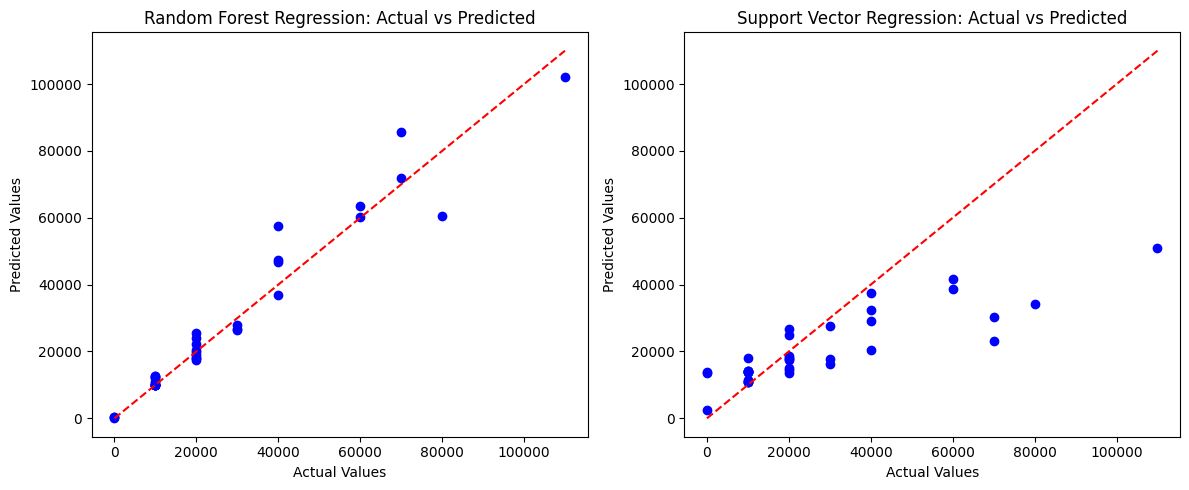

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Plot the scatter plot of actual vs predicted values
axes[0].scatter(y_test*10000, y_pred_rfr*10000, color='blue')
axes[0].plot([min(y_test)*10000, max(y_test)*10000], [min(y_test)*10000, max(y_test)*10000], color='red', linestyle='--')
axes[0].set_xlabel('Actual Values')
axes[0].set_ylabel('Predicted Values')
axes[0].set_title('Random Forest Regression: Actual vs Predicted')

axes[1].scatter(y_test*10000, y_pred_svr*10000, color='blue')
axes[1].plot([min(y_test)*10000, max(y_test)*10000], [min(y_test)*10000, max(y_test)*10000], color='red', linestyle='--')
axes[1].set_xlabel('Actual Values')
axes[1].set_ylabel('Predicted Values')
axes[1].set_title('Support Vector Regression: Actual vs Predicted')


plt.tight_layout()
plt.show()

#Real Time Analysis

Now Lets see how to predict the price of a mobile whose features are provided at runtime

In [ ]:
from tabulate import tabulate

features = sorted(['Brand', 'Processor', 'Resolution', 'UI'])

for feature in features:
    values = sorted(df1[feature].unique())

    if len(values) > 0:
        table_data = [values[i:i+3] for i in range(0, len(values), 3)]
        headers = [feature]
        table_str = tabulate(table_data, headers, tablefmt="fancy_grid")
        print(table_str)
        print()


╒═════════╤══════════╤═════════╕
│         │          │ Brand   │
╞═════════╪══════════╪═════════╡
│ Apple   │ Google   │ Infinix │
├─────────┼──────────┼─────────┤
│ Lava    │ Motorola │ Nokia   │
├─────────┼──────────┼─────────┤
│ Nothing │ OPPO     │ OnePlus │
├─────────┼──────────┼─────────┤
│ POCO    │ Samsung  │ Tecno   │
├─────────┼──────────┼─────────┤
│ Xiaomi  │ iQOO     │ realme  │
├─────────┼──────────┼─────────┤
│ vivo    │          │         │
╘═════════╧══════════╧═════════╛

╒═════════════════════════════════════════════════════════════════════════════╤═════════════════════════════════════╤════════════════════════════════╕
│                                                                             │                                     │ Processor                      │
╞═════════════════════════════════════════════════════════════════════════════╪═════════════════════════════════════╪════════════════════════════════╡
│ Apple A13 Bionic                                 

In [ ]:
input_text = {'Brand': '6',
              'RAM': 8,
              'Internal_Memory': 128,
              'Processor': 'MediaTek Helio P35',
              'back_camera': 48,
              'front_camera': 16,
              'battery': 4500,
              'Resolution': '1080 x 2400 pixels',
              'weight': 180,
              'Refresh_Rate': 120,
              }
Five_G = True

input_df = pd.DataFrame([input_text])
input_df['Brand'] = Brand_le.transform(input_df['Brand'])
input_df['Processor'] = processor_le.transform(input_df['Processor'])
input_df['Resolution'] = res_le.transform(input_df['Resolution'])

# Predict the result
prediction = RFR.predict(input_df)

pre = prediction[0]*10000
if(Five_G):
  pre = pre+5000
print('Predicted price range of the Mobile is:',pre-2500,'-',pre+2500)

Predicted price range of the Mobile is: 24350.0 - 29350.0


In [ ]:
input_text = {'Brand':'Apple',
              'RAM': 6,
              'Internal_Memory': 128,
              'Processor': 'Apple A14 Bionic',
              'back_camera': 12,
              'front_camera': 12,
              'battery': 3687,
              'Resolution': '1284 x 2778 pixels',
              'weight': 226,
              'Refresh_Rate': 60,
              }

Five_G = False

# Convert input text to categorical codes
input_df = pd.DataFrame([input_text])
input_df['Brand'] = Brand_le.transform(input_df['Brand'])
input_df['Processor'] = processor_le.transform(input_df['Processor'])
input_df['Resolution'] = res_le.transform(input_df['Resolution'])

# Predict the result
prediction = RFR.predict(input_df)

pre = prediction[0]*10000
if(Five_G):
  pre = pre+5000
print('Predicted price range of the Mobile is:',pre-2500,'-',pre+2500)

Predicted price range of the Mobile is: 99550.0 - 104550.0
